In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os

from datetime import datetime
from datetime import date

pd.set_option('display.max_columns', 500)

In [0]:
!pip install -U -q PyDrive

In [0]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'1ObOOFZ5PwU5SWG8OjAxch8BzmHkWrz6S' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))
  
downloaded = drive.CreateFile({'id': '1d7BFHy0y_9G2HFAFHRjVsiMbmfBMOmCl'})
downloaded.GetContentFile('data.csv')

title: Copy of data.csv, id: 1LWKbNxmi1gvUpeo3XDthZ8PWQGG5JTkH
title: data.csv, id: 1d7BFHy0y_9G2HFAFHRjVsiMbmfBMOmCl


In [0]:
# # Merging the datasets 
# players = pd.read_csv('data/2012-18_playerBoxScore.csv')
# standings = pd.read_csv('data/2012-18_standings.csv')

# standings.rename(index=str, columns = {"stDate": "gmDate"}, inplace=True)

# set(official.columns).difference(set(players.columns))
# print(players.shape, standings.shape)
# data = players.merge(standings, on = ["gmDate", "teamAbbr"])

# print(players.shape, standings.shape, data.shape)
# set(data.columns).difference(set(official.columns))

# data = data.merge(official, on = ['gmDate', 'teamAbbr'])
# print(data.shape)
# data

In [0]:
#Reading the merged data
data = pd.read_csv('data.csv').drop(['Unnamed: 0'],axis=1)
print(data.shape)
data.head(20)

(465421, 204)


,gmDate,gmTime_x,seasTyp,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.0000,9,2,0.2222,1,1,1.00,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.0000,9,2,0.2222,1,1,1.00,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Smith,Michael,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.0000,9,2,0.2222,1,1,1.00,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,

In [0]:
#Checking which columns are null
data[data.isna()].head()

,gmDate,gmTime_x,seasTyp,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [0]:
'''Create a function to calculate age from date of birth'''
def age_calc(dob):
    dob = datetime.strptime(dob, "%Y-%m-%d").date()
    #dob = datetime.strptime(dob, "%d.%m.%Y").date()
    today = date.today()
    return today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))

In [0]:
'''Add a new column in dataset with player's calculated age'''
data['age'] = data['playBDate'].apply(age_calc)
data.head(5)

,gmDate,gmTime_x,seasTyp,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,age
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,32
1,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Smith,Michael,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,32
2,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0

In [0]:
'''For linear regression to work, extract Year and Month of game; Leaving out day & time'''
data['game_year'] = pd.DatetimeIndex(data['gmDate']).year
data['game_month'] = pd.DatetimeIndex(data['gmDate']).month
data.head()

,gmDate,gmTime_x,seasTyp,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,age,game_year,game_month
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,32,2012,10
1,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Smith,Michael,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,32,2012,10
2,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,

# Data Exploration / EDA

In [0]:
data.describe()

,teamDayOff_x,playMin,playHeight,playWeight,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptDayOff_x,rank,gameWon,gameLost,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,age,game_year,game_month
count,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.00000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.00000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000,465421.000000
mean,1.940875,22.926436,79.012859,217.971589,9.695173,2.121978,1.305115,0.734765,0.460843,1.908103,7.971164,3.621534,0.419570,5.696722,2.809388,0.438209,2.274442,0.8121

### Visualization of selected interesting data points distribution values

#### Player Height distribution

[]

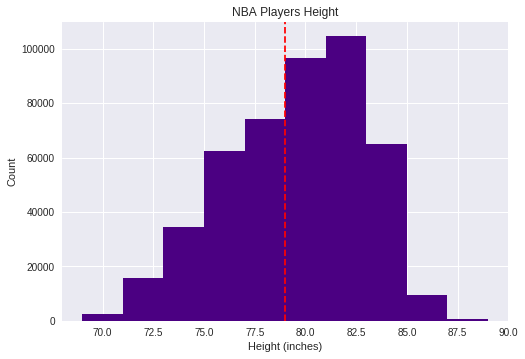

In [0]:
'''Player Height distribution'''
plt.hist(data["playHeight"], color="indigo")
plt.title("NBA Players Height")
plt.xlabel("Height (inches)")
plt.ylabel("Count")
plt.axvline(data['playHeight'].mean(), color='r', linestyle='dashed')
plt.plot()


#### Age distribution

[]

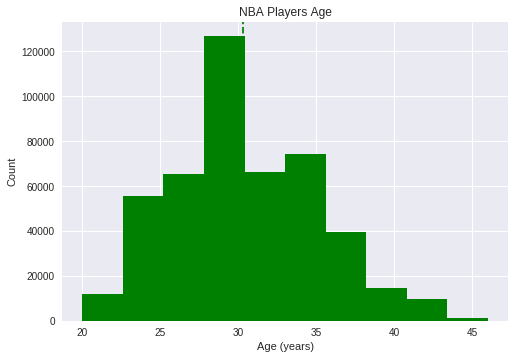

In [0]:
'''Age distribution'''
plt.hist(data["age"], color="green")
plt.title("NBA Players Age")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.axvline(data['age'].mean(), color='g', linestyle='dashed')
plt.plot()

### Selected Comparisons - 3 points made vs attempted


Average three pointers made is:  0.8121464222714488
Average three pointers attempted is:  2.274441849422351


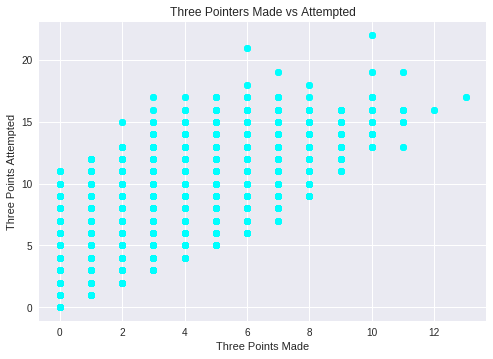

In [0]:
'''Comparing the three points attempted and the three points made'''
plt.plot(data["play3PM"], data["play3PA"], "o", color="aqua")
plt.title("Three Pointers Made vs Attempted")
plt.xlabel("Three Points Made")
plt.ylabel("Three Points Attempted")
plt.show
print("Average three pointers made is: ", data["play3PM"].mean())
print("Average three pointers attempted is: ", data["play3PA"].mean())


#### Player Height vs Blocks Distribution

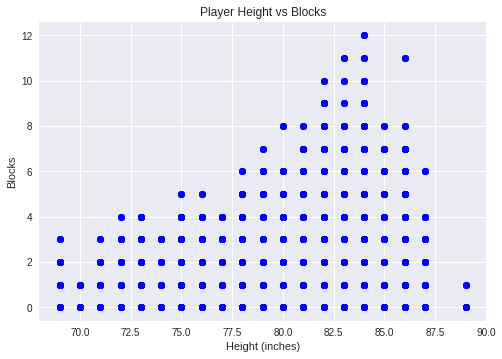

In [0]:
plt.plot(data.playHeight, data.playBLK, "o", color='b')
plt.title("Player Height vs Blocks")
plt.xlabel("Height (inches)")
plt.ylabel("Blocks")
plt.show()

### Visualization with pair plots to compare various metrics against each other, using Seaborn

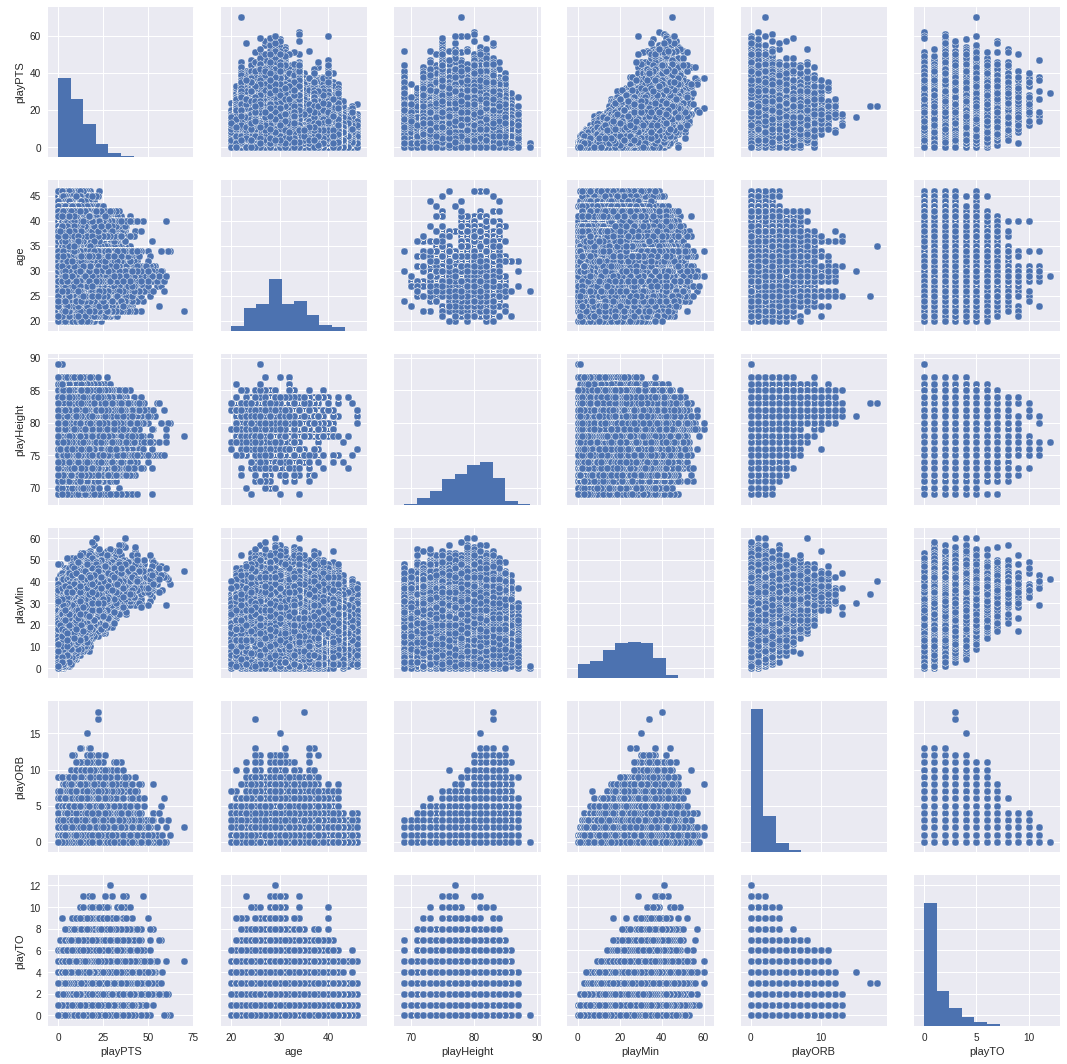

In [0]:
'''Plots of relationships between Player Points Scored, Age, Height, Minutes Played, Offensive Rebound, TurnOvers made''' 

sns.pairplot(data, vars = ["playPTS", "age", "playHeight", "playMin",  "playORB", "playTO"], dropna = True)

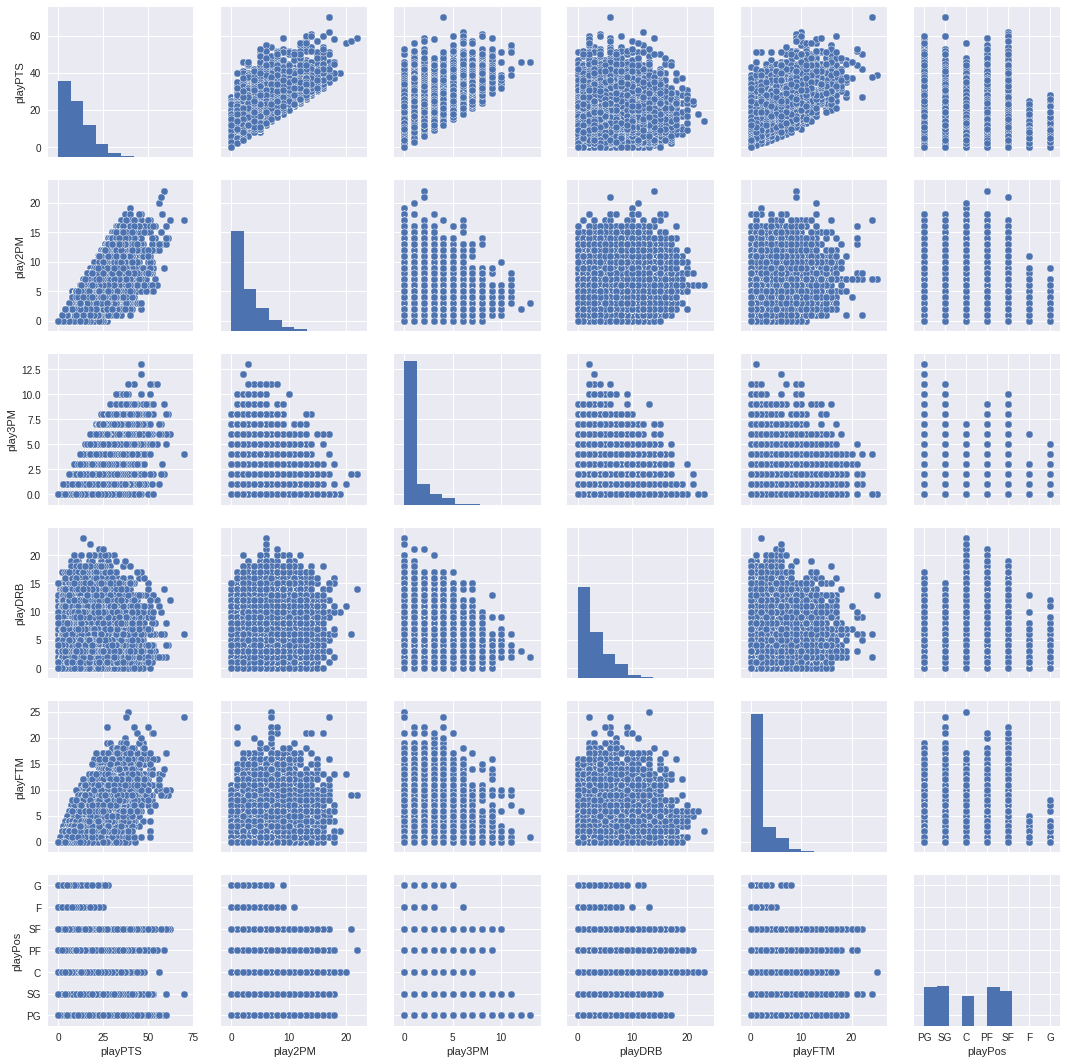

In [0]:


'''Pairplots for relationships between Player Points Scored, 2 Point Shots Made, 3 Point Shots Made, 
Defensive Rebound, Free throw shots made, Player position'''

sns.pairplot(data, vars = [ "playPTS", "play2PM", "play3PM", "playDRB", "playFTM", "playPos"], dropna = True)

#### Compare LeBron James performances : Points Scored vs other scoring metrics

In [0]:

data_lebron = data[data['playDispNm'].str.contains('LeBron James')]
data_lebron.head()

,gmDate,gmTime_x,seasTyp,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,age,game_year,game_month
102,2012-10-30,20:00,Regular,James,LeBron,MIA,East,Southeast,Home,Win,0,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,LeBron James,Starter,29,SF,80,240,1984-12-30,26,3,0,2,0,2,16,10,0.625,12,8,0.6667,4,2,0.5000,5,4,0.8000,1,9,10,BOS,East,Atlantic,Away,Loss,0,1,1st,1,0,W1,win,1,0.0,120,107,1,0,0,0,1,0,1,1,1,120.0,107.0,13.0,0,0,0,0,0.0000,0.000,13.0,13.0000,0.9280,0.8313,68.1666,13.8334,0.8690,71.2580,10.7420,20:00,McCutchen,Monty,East,Southeast,1,1,240,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.50,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,12.8205,81.5789,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,BOS,East,Atlantic,Away,Loss,240,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,17.0732,82.9268,15.4859,4.2113,2.1056,3.2258,1.4267,75.250,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832,34,2012,10
103,2012-10-30,20:00,Regular,James,LeBron,MIA,East,Southeast,Home,Win,0,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,LeBron James,Starter,29,SF,80,240,1984-12-30,26,3,0,2,0,2,16,10,0.625,12,8,0.6667,4,2,0.5000,5,4,0.8000,1,9,10,BOS,East,Atlantic,Away,Loss,0,1,1st,1,0,W1,win,1,0.0,120,107,1,0,0,0,1,0,1,1,1,120.0,107.0,13.0,0,0,0,0,0.0000,0.000,13.0,13.0000,0.9280,0.8313,68.1666,13.8334,0.8690,71.2580,10.7420,20:00,Wright,Sean,East,Southeast,1,1,240,0,120,25,8,8,5,20,79,43,0.5443,63,35,0.5556,16,8,0.50,32,26,0.8125,5,31,36,31,31,31,27,0,0,0,0,46.7532,58.1395,0.6446,0.5949,12.8205,81.5789,7.9145,8.4225,5.2641,7.9365,1.5190,97.000,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,BOS,East,Atlantic,Away,Loss,240,0,107,24,16,4,2,23,75,39,0.5200,62,33,0.5323,13,6,0.4615,28,23,0.8214,7,34,41,25,29,22,31,0,0,0,0,53.2468,61.5385,0.6127,0.5600,17.0732,82.9268,15.4859,4.2113,2.1056,3.2258,1.4267,75.250,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832,34,2012,10
104,2012-10-30,20:00,Regular,James,LeBron,MIA,East,Southeast,Home,Win,0,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,LeBron James,Starter,29,SF,80,240,1984-12-30,26,3,0

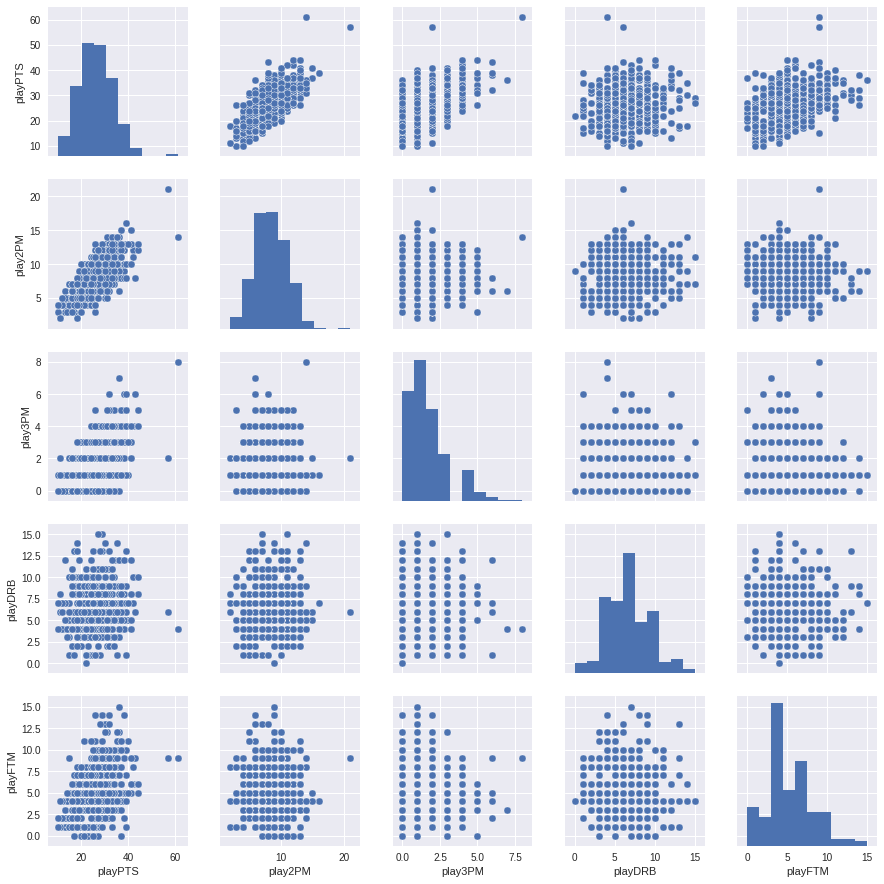

In [0]:
sns.pairplot(data_lebron, vars = [ "playPTS", "play2PM", "play3PM", "playDRB", "playFTM"], dropna = True)

In [0]:
before = data.shape[0]
data = data.dropna()
after = data.shape[0]
print(f'We dropped {before - after} rows ')

We dropped 82 rows 


In [0]:
'''No more NA observations''' 
data.isna().sum().sum()

0

In [0]:
'''columns to drop'''
print(data['seasTyp'].unique())

data = data.drop(['seasTyp'],axis=1) # only one season type
data.head()

['Regular']


,gmDate,gmTime_x,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,age,game_year,game_month
0,2012-10-30,19:00,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,32,2012,10
1,2012-10-30,19:00,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Smith,Michael,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,32,2012,10
2,2012-10-30,19:00,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,L1,loss,1,1.0,84,94,0,0,0,1,0,

In [0]:
'''Creating a table where each observation is a player and also creating a list 
of aggregation functions for each possible relevant column''' 


cols = {'gmDate':'count',
'playStat': pd.Series.mode, # tells us 
'playMin': 'mean',    # number of minutes on the floor 
'playPos':pd.Series.mode,# his position on the team
'playHeight':pd.Series.mode,
'playBDate':pd.Series.mode,
 'playPTS': 'mean', # pts
 'playAST': 'mean', # assists
 'playTO':'mean',    # turnovers
 'playSTL': 'mean', # steals
 'playBLK': 'mean', # blocks 
 'playPF': 'mean',   # personal fouls made 
 'playFGA':'mean',    # attempts field goals
 'playFGM':'mean',   # shots made 
 'playFG%':'mean',   # FGA accruacy 
 'play2P%':'mean',   # 2pt  percentage made 
 'play2PA':'mean',   # 2[t attempts ] made 
 'play2PM':'mean',   # 2pt shots made  
 'play2P%':'mean',   # FGA accruacy 
 'play3PA':'mean',   # 3pt attept s
  'play3PM':'mean',   # 3pt made 
 'play3P%':'mean',   # 3pt accruacy 
 'playFTA':'mean',   # free thriow attempt s
 'playFTM':'mean',  # free throw makes 
 'playFT%':'mean',  # free throw percentage 
 'playORB':'mean',   # rebounds offensive 
 'playDRB':'mean',   # rebounds def 
 'playTRB':'mean',    # total
 'gameWon': 'count'
} 


#Feature Engineering


In [0]:
'''A function to calculate the fantasy score. The fantasy score is based off of the offical NBA scoring system '''
def fantasy_score(x):
    points = x['playPTS'] * 1
  
    rebounds = x['playORB'] * 1.2
  
    assists = x['playAST'] * 1.5
  
    steals = x['playSTL'] * 3 
  
    blocks = x['playBLK'] * 3
  
    turnovers = x['playTO'] * -1
  
    total = points + rebounds + assists + steals + blocks + turnovers
    return total


In [0]:
'''Adding a new column called fantasy_score to data'''
data['fantasy_score'] = fantasy_score(data)
data.head()

data = data[::3]

'The findings, however, are inconclusive and do not provide support to make this feature augmentation'

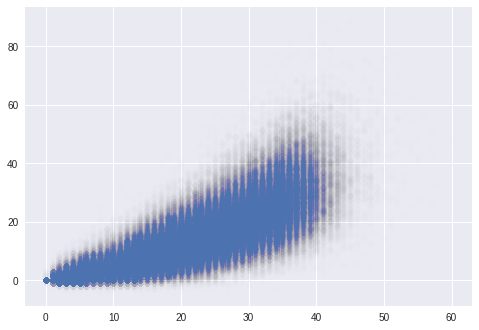

In [0]:
'''We wanted to see if we should convert the playMin attribute to a binary feature instead of a count feature. For instance, we would
convert all players who had more than 30 min. played on average during the season up to this point to 1 and less than 30 min. to 0'''

plt.scatter(data['playMin'], data['fantasy_score'], alpha=.005)

'''The findings, however, are inconclusive and do not provide support to make this feature augmentation'''

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


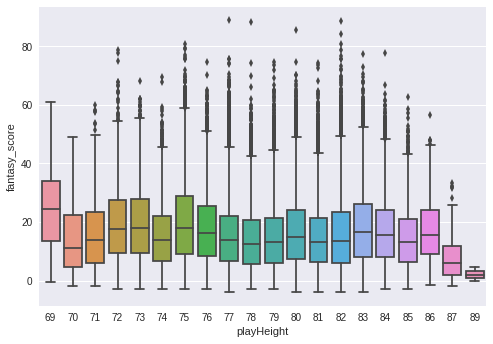

In [0]:
'''Wanted to see if we should add a feature that would determine how the players height would impact the fantasy score.'''

sns.boxplot(data['playHeight'], data['fantasy_score'])
sns.distplot(data['playHeight'])


In [0]:
'''Function to change the streak to be an int instead of a string (positive for win streak and negative for loss streak)'''
def stk_to_num(val):
  if 'W' in val:
    return int(val[val.index('W') + 1:])
  elif'L' in val:
    return -int(val[val.index('L') + 1:])
  else:
    return 0

In [0]:
'''Using the stk_to_num function and adding replacing the streak column. 
Also checking for correlation between streak and fantasy score'''

data['stk'] = data['stk'].apply(stk_to_num)

data

,gmDate,gmTime_x,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,age,game_year,game_month,fantasy_score
0,2012-10-30,19:00,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.0000,9,2,0.2222,1,1,1.0000,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,-1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0000,0.000000,-10.0000,-10.0000,0.1707,0.1730,14.1860,67.8140,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,32,2012,10,16.2
3,2012-10-30,19:00,Ariza,Trevor,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Trevor Ariza,Starter,25,SG,80,200,1985-06-30,9,4,0,3,2,0,8,3,0.3750,4,1,0.2500,4,2,0.5000,2,1,0.5000,1,2,3,CLE,East,Central,Home,Win,0,14,14th,0,1,-1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0000,0.000000,-10.0000,-10.0000,0.1707,0.1730,14.1860,67.8140,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,33,2012,10,31.2
6,2012-10-30,19:00,Okafor,Emeka,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Emeka Okafor,Starter,25,C,82,255,1982-09-28,10,0,1,0,4

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


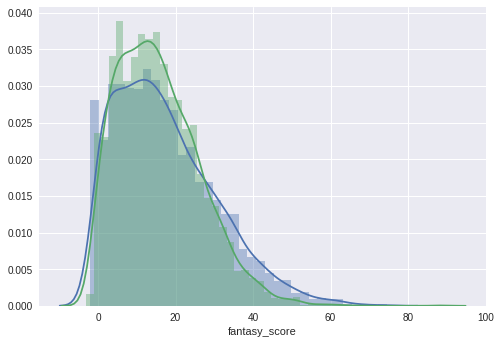

In [0]:
'''Checking for the players who have a win streak of greater than 6 and a losing streak of less than -6.'''
positive_stk_test = data[data['stk'] > 6]
negative_stk_test = data[data['stk'] < -6]

'''Creating a historgram to see the relationship between positive/negative streaks and fantasy points'''
sns.distplot(positive_stk_test['fantasy_score'])
sns.distplot(negative_stk_test['fantasy_score'])

_

In [0]:
list(data.columns)

['gmDate',
 'gmTime_x',
 'playLNm',
 'playFNm',
 'teamAbbr',
 'teamConf_x',
 'teamDiv_x',
 'teamLoc_x',
 'teamRslt_x',
 'teamDayOff_x',
 'offLNm1',
 'offFNm1',
 'offLNm2',
 'offFNm2',
 'offLNm3',
 'offFNm3',
 'playDispNm',
 'playStat',
 'playMin',
 'playPos',
 'playHeight',
 'playWeight',
 'playBDate',
 'playPTS',
 'playAST',
 'playTO',
 'playSTL',
 'playBLK',
 'playPF',
 'playFGA',
 'playFGM',
 'playFG%',
 'play2PA',
 'play2PM',
 'play2P%',
 'play3PA',
 'play3PM',
 'play3P%',
 'playFTA',
 'playFTM',
 'playFT%',
 'playORB',
 'playDRB',
 'playTRB',
 'opptAbbr_x',
 'opptConf_x',
 'opptDiv_x',
 'opptLoc_x',
 'opptRslt_x',
 'opptDayOff_x',
 'rank',
 'rankOrd',
 'gameWon',
 'gameLost',
 'stk',
 'stkType',
 'stkTot',
 'gameBack',
 'ptsFor',
 'ptsAgnst',
 'homeWin',
 'homeLoss',
 'awayWin',
 'awayLoss',
 'confWin',
 'confLoss',
 'lastFive',
 'lastTen',
 'gamePlay',
 'ptsScore',
 'ptsAllow',
 'ptsDiff',
 'opptGmPlay',
 'opptGmWon',
 'opptOpptGmPlay',
 'opptOpptGmWon',
 'sos',
 'rel%Indx',
 'mo

In [0]:
'''Creating a new binary column called home that returns 1 if it is a home game and a 0 if it an away game'''
data['home'] = data['teamLoc_x'].apply(lambda x: 1 if 'Home' else 0)

'''Creating a new binary column called starter that will return 1 if the player is a starter and 0 if the player is a bench player'''
data['starter'] = data['playStat'].apply(lambda x: 1 if 'Starter' else 0)

data.head()

,gmDate,gmTime_x,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,age,game_year,game_month,fantasy_score,home,starter
0,2012-10-30,19:00,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,-1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,32,2012,10,16.2,1,1
3,2012-10-30,19:00,Ariza,Trevor,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Trevor Ariza,Starter,25,SG,80,200,1985-06-30,9,4,0,3,2,0,8,3,0.3750,4,1,0.25,4,2,0.5000,2,1,0.5,1,2,3,CLE,East,Central,Home,Win,0,14,14th,0,1,-1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,33,2012,10,31.2,1,1
6,2012-10-30,19:00,Okafor,Emeka,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Emeka Okafor,Starter,25,C,82,255,1982-09-28,10,0,1,0,4,1,10,4,0.4000,10,4,0.40,0,0,0.0000,4,2,0.5,5,2,7,CLE,East,Central,

In [0]:
'''Function created to distinguish different playerss positions'''
def player_pos_ohe(df, col):
  ohe = pd.get_dummies(df[col])
  df = pd.merge(left=df, right=ohe, left_index=True, right_index=True)
  return df

data = player_pos_ohe(data, 'playPos')
data

,gmDate,gmTime_x,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,age,game_year,game_month,fantasy_score,home,starter,C,F,G,PF,PG,SF,SG
0,2012-10-30,19:00,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.0000,9,2,0.2222,1,1,1.0000,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,-1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0000,0.000000,-10.0000,-10.0000,0.1707,0.1730,14.1860,67.8140,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,32,2012,10,16.2,1,1,0,0,0,0,1,0,0
3,2012-10-30,19:00,Ariza,Trevor,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Trevor Ariza,Starter,25,SG,80,200,1985-06-30,9,4,0,3,2,0,8,3,0.3750,4,1,0.2500,4,2,0.5000,2,1,0.5000,1,2,3,CLE,East,Central,Home,Win,0,14,14th,0,1,-1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0000,0.000000,-10.0000,-10.0000,0.1707,0.1730,14.1860,67.8140,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.2500,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4000,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.3500,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5000,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409,33,2012,10,31.2,1,1,0,0,0,0,0,0,1
6,2012-10-30,19:00,Okafor,Emeka,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Work

In [0]:
def avg_to_date(df, col):
  players = {}
  avg_col = []
  col_name = 'avg' + col[0].upper() + col[1:]
  print('Starting ' + col)
  for index, row in df.iterrows():
    key = row['playDispNm'] + ' ' + row['playBDate']
    if key not in players.keys():
      players[key] = [row[col], 1]
      avg_col.append(row[col])
    else:
      avg_col.append(players[key][0]/players[key][1])
      players[key] = [players[key][0] + row[col], players[key][1] + 1]
  print('Finished ' + col)
  df[col_name] = avg_col

In [0]:
for col in ['playMin', 'playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK']:
  avg_to_date(data, col)

Starting playMin
Finished playMin
Starting playPTS
Finished playPTS
Starting playAST
Finished playAST
Starting playTO
Finished playTO
Starting playSTL
Finished playSTL
Starting playBLK
Finished playBLK


In [0]:
data.head()

,gmDate,gmTime_x,playLNm,playFNm,teamAbbr,teamConf_x,teamDiv_x,teamLoc_x,teamRslt_x,teamDayOff_x,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,playDispNm,playStat,playMin,playPos,playHeight,playWeight,playBDate,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,playFGM,playFG%,play2PA,play2PM,play2P%,play3PA,play3PM,play3P%,playFTA,playFTM,playFT%,playORB,playDRB,playTRB,opptAbbr_x,opptConf_x,opptDiv_x,opptLoc_x,opptRslt_x,opptDayOff_x,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,ptsFor,ptsAgnst,homeWin,homeLoss,awayWin,awayLoss,confWin,confLoss,lastFive,lastTen,gamePlay,ptsScore,ptsAllow,ptsDiff,opptGmPlay,opptGmWon,opptOpptGmPlay,opptOpptGmWon,sos,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5,gmTime_y,offLNm,offFNm,teamConf_y,teamDiv_y,teamLoc_y,teamRslt_y,teamMin,teamDayOff_y,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,teamPTS8,teamTREB%,teamASST%,teamTS%,teamEFG%,teamOREB%,teamDREB%,teamTO%,teamSTL%,teamBLK%,teamBLKR,teamPPS,teamFIC,teamFIC40,teamOrtg,teamDrtg,teamEDiff,teamPlay%,teamAR,teamAST/TO,teamSTL/TO,opptAbbr_y,opptConf_y,opptDiv_y,opptLoc_y,opptRslt_y,opptMin,opptDayOff_y,opptPTS,opptAST,opptTO,opptSTL,opptBLK,opptPF,opptFGA,opptFGM,opptFG%,oppt2PA,oppt2PM,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace,age,game_year,game_month,fantasy_score,home,starter,C,F,G,PF,PG,SF,SG,avgPlayMin,avgPlayPTS,avgPlayAST,avgPlayTO,avgPlaySTL,avgPlayBLK
0,2012-10-30,19:00,Price,A.J.,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,A.J. Price,Starter,29,PG,74,195,1986-10-07,7,6,1,0,0,1,13,2,0.1538,4,0,0.00,9,2,0.2222,1,1,1.0,1,1,2,CLE,East,Central,Home,Win,0,14,14th,0,1,-1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,32,2012,10,16.2,1,1,0,0,0,0,1,0,0,29.0,7.0,6.0,1.0,0.0,0.0
3,2012-10-30,19:00,Ariza,Trevor,WAS,East,Southeast,Away,Loss,0,Brothers,Tony,Smith,Michael,Workman,Haywoode,Trevor Ariza,Starter,25,SG,80,200,1985-06-30,9,4,0,3,2,0,8,3,0.3750,4,1,0.25,4,2,0.5000,2,1,0.5,1,2,3,CLE,East,Central,Home,Win,0,14,14th,0,1,-1,loss,1,1.0,84,94,0,0,0,1,0,1,0,0,1,84.0,94.0,-10.0,0,0,0,0,0.0,0.0,-10.0,-10.0,0.1707,0.173,14.186,67.814,0.1352,11.0864,70.9136,19:00,Brothers,Tony,East,Southeast,0,0,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.25,0.4251,0.4,33.3333,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0,84.6154,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.53,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.0,61.6667,105.6882,94.4447,11.2435,0.439,16.7072,1.0476,33.3333,88.9409,88.9409,33,2012,10,31.2,1,1,0,0,0,0,0,0,1,25.0,9.0,4.0,0.0,3.0,2.0
6,2012-10-30,19:00,Okafor,Emeka,WAS,East,Southeast,Away,Loss,0,Broth

#Linear Regression Model

In [0]:
features = ['home', 'starter', 'teamDayOff_x', 'avgPlayMin', 'C', 'F', 'G', 'PF', 'SF', 'SG', 'avgPlayMin', 'avgPlayPTS', 'avgPlayAST', 'avgPlayTO', 'avgPlaySTL', 'avgPlayBLK', 'age', 'fantasy_score']
to_train = data[features]

In [0]:
# some preprocessing
to_train = to_train.reset_index().drop(['index','avgPlayMin'],1)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV

# splitting the to_train into the training data and targets 
train = to_train.iloc[:,:-1]
target = to_train.iloc[:,-1:]

# setting aside .05 as the final test split
X_train, X_test, y_train, y_test = train_test_split(train, target,test_size=.05,random_state=42)

# setting asdie .1 of the .95 of full dataset to validate 
X_train, X_val, y_train, y_val = train_test_split(train, target,test_size=.1,random_state=42)

X_train.head()

,home,starter,teamDayOff_x,C,F,G,PF,SF,SG,avgPlayPTS,avgPlayAST,avgPlayTO,avgPlaySTL,avgPlayBLK,age
37662,1,1,4,0,0,0,0,0,1,6.842105,1.368421,1.013158,0.618421,0.263158,30
133335,1,1,2,0,0,0,0,0,0,6.471264,5.557471,1.873563,1.419540,0.126437,27
76385,1,1,2,0,0,0,0,0,0,13.878173,4.756345,2.776650,1.538071,0.573604,29
84908,1,1,3,0,0,0,0,0,1,26.505882,6.368627,3.886275,1.772549,0.580392,29
106204,1,1,2,0,0,0,0,1,0,7.704000,0.600000,0.576000,0.160000,0.064000,27


**Trying Vanilla Linear Regression**

In [0]:
from sklearn.linear_model import LinearRegression
rmse = lambda x,y: np.sqrt(np.mean((x - y)**2))
linreg = LinearRegression(fit_intercept =True)
linreg.fit(X_train,y_train)
print(linreg.score(X_val,y_val))

print(rmse(linreg.predict(X_val), y_val))

0.43386136269483866
fantasy_score    8.774021
dtype: float64


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'True vs predicted training points distribution')

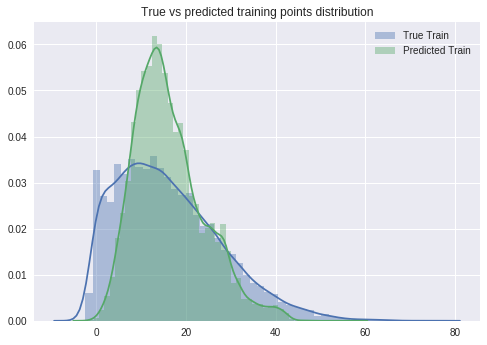

In [0]:
sns.distplot(y_val,label='True Train')
sns.distplot(linreg.predict(X_val), label='Predicted Train')
plt.legend()
plt.title('True vs predicted training points distribution')

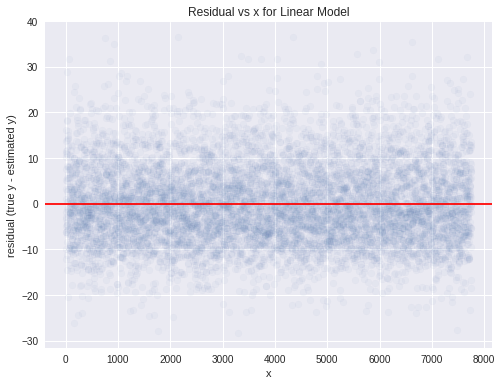

In [0]:
plt.figure(figsize=(8,6))      
plt.scatter(np.arange(len(X_test)), y_test - linreg.predict(X_test), alpha=.04)
plt.xlabel('x')
plt.ylabel('residual (true y - estimated y)')
plt.title('Residual vs x for Linear Model')
plt.axhline(y = 0, color='r')

**Trying rIdge CV**

In [0]:
# Ridge CV

#hyperparameters to test 
a = np.arange(1e-3,1,.05)

ridge = RidgeCV(alphas=a,fit_intercept=True, store_cv_values=True)
ridge.fit(X_train,y_train)

train_pred = ridge.predict(X_train)
val_pred = ridge.predict(X_val)


train_acc = rmse(train_pred, y_train)
val_acc = rmse(val_pred, y_val)

print(train_acc, val_acc)




fantasy_score    8.972667
dtype: float64 fantasy_score    8.774021
dtype: float64


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'True vs predicted training points distribution')

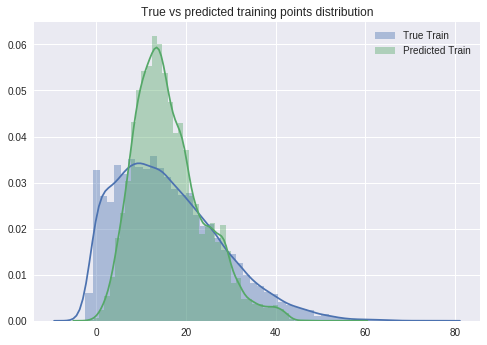

In [0]:
sns.distplot(y_val,label='True Train')
sns.distplot(val_pred, label ='Predicted Train')
plt.legend()
plt.title('True vs predicted training points distribution')

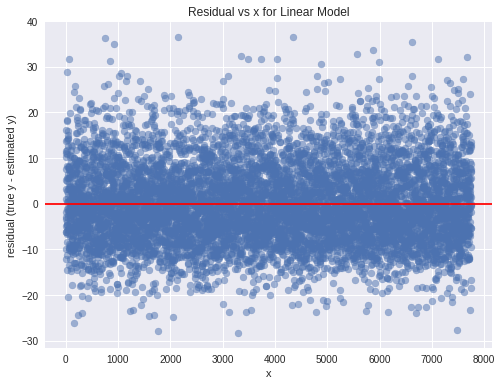

In [0]:
plt.figure(figsize=(8,6))      
plt.scatter(np.arange(len(X_test)), y_test - ridge.predict(X_test), alpha=.5)
plt.xlabel('x')
plt.ylabel('residual (true y - estimated y)')
plt.title('Residual vs x for Linear Model')
plt.axhline(y = 0, color='r')

#Extra Scratch Work (We can delete this later)

In [0]:
#extra comments from above

In [0]:
# ## Remember to drop following line from final EDA set. This is temporarily used to run things faster
# data = data.head(50000) #  For now, during development reduced data set to ensure syntax are right. Later on remove it
# data

In [0]:
# Later on create a new dataset leaving out some columns like original Date, time, DOB etc. 
# Many of these columns shall be filtered out from model as part of reducing noise variables

In [0]:
# selecting columns from the ones chosen above to create a dataset we have aggregated information abotu the player in general

# this table is the player on as each observation, and inforamtion about them. each column is aggreagted via an appropriate function.
# data[list(cols.keys())+['name']].groupby('name').agg(cols)


# some errors to fix

In [0]:
#sns.kdeplot(data['playMin'], data['fantasy_score'])

In [0]:
# basic training data to get
#basic_features = list(cols.keys()) + ['age','playDispNm','stk', 'playMin', 'fantasy_score']
#model_data = data[basic_features]
#print(model_data.shape)


In [0]:
#data.drop_duplicates(inplace=True)

In [0]:
# When Fantasy points column metrics is available, can add that to this pairplot